In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd     
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
# load data
bankdata = pd.read_csv("./bill_authentication.csv")

In [3]:
# see the data
bankdata.shape

(1372, 5)

In [4]:
# see head
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
# data processing
X = bankdata.drop('Class', axis=1)  
y = bankdata['Class']

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

# train the SVM
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
# predictions
y_pred = svclassifier.predict(X_test)  

# Evaluate model
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[142   2]
 [  1 130]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       144
           1       0.98      0.99      0.99       131

   micro avg       0.99      0.99      0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [8]:
# Iris dataset  https://archive.ics.uci.edu/ml/datasets/iris4
def import_iris():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

    # Assign colum names to the dataset
    colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

    # Read dataset to pandas dataframe
    irisdata = pd.read_csv(url, names=colnames) 

    # process
    iris_X = irisdata.drop('Class', axis=1)  
    iris_y = irisdata['Class']  

    # train
    from sklearn.model_selection import train_test_split  
    X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size = 0.20)

In [9]:
def polynomial_kernel():
    # TODO
    # NOTE: use 8-degree in the degree hyperparameter. 
    # Trains, predicts and evaluates the model
    svclassifier = SVC(kernel='poly', degree=8)  
    svclassifier.fit(X_train, y_train)  
    print('polynomial_kernel')
    y_pred = svclassifier.predict(X_test)  
    print(confusion_matrix(y_test, y_pred))  
    print(classification_report(y_test, y_pred)) 

In [10]:
def gaussian_kernel():
    # TODO
    # Trains, predicts and evaluates the model
    svclassifier = SVC(kernel='rbf')  
    svclassifier.fit(X_train, y_train) 
    y_pred = svclassifier.predict(X_test) 
    print('gaussian_kernel')
    print(confusion_matrix(y_test, y_pred))  
    print(classification_report(y_test, y_pred))

In [11]:
def sigmoid_kernel():
    # TODO
    # Trains, predicts and evaluates the model
    svclassifier = SVC(kernel='sigmoid')  
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test) 
    print('sigmoid_kernel')
    print(confusion_matrix(y_test, y_pred))  
    print(classification_report(y_test, y_pred))

In [12]:
def test():
    import_iris()
    polynomial_kernel()
    gaussian_kernel()
    sigmoid_kernel()
    # NOTE: 3-point extra credit for plotting three kernel models.

In [13]:
test()

polynomial_kernel
[[136   8]
 [  0 131]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       144
           1       0.94      1.00      0.97       131

   micro avg       0.97      0.97      0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275

gaussian_kernel
[[144   0]
 [  0 131]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       131

   micro avg       1.00      1.00      1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

sigmoid_kernel
[[104  40]
 [ 68  63]]
              precision    recall  f1-score   support

           0       0.60      0.72      0.66       144
           1       0.61      0.48      0.54       131

   micro avg       0.61      0.61      0.61       275
   macro a

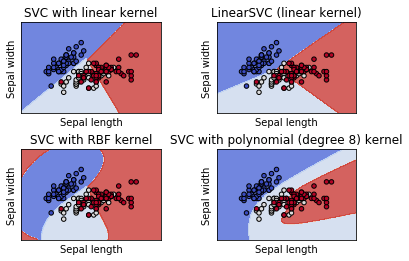

In [21]:
from sklearn import svm, datasets
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=8, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 8) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()